#### KNN METHOD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv('CARDIA.csv')

In [3]:
df.head()

,Age,Sex,Chest Pain,Shortest of breath,Heaviness or tightness,Radiation into arms nack and jaw,Congestion or burning,Abnormal breathing,Losing flat cause,Decrease of sterngth,...,Fever,Clubbing,Rash,Smocking,Hypertension,Hyperchoies terolamia,Myocandial,Disease,target,Disease_r
0,31,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,20,1,PEPTICULCER
1,24,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,DYSPNOEA
2,50,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,21,1,ANEMIA
3,36,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,22,1,PHEUMONIA
4,40,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,23,1,PNECIMOTHORAX


In [4]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'Shortest of breath',
       'Heaviness or tightness', 'Radiation into arms nack and jaw',
       'Congestion or burning', 'Abnormal breathing', 'Losing flat cause',
       'Decrease of sterngth', 'Trobale with balance',
       'Heart rate normal and faster', 'Trouble with sawllowing',
       'Low blood presure', 'Missing in heartbeat rythom/abnormal rythom',
       'Need pellow or prefer to sleep in chair', 'Syncopal attack',
       'Debilitation', 'Fever', 'Clubbing', 'Rash', 'Smocking', 'Hypertension',
       'Hyperchoies terolamia', 'Myocandial', 'Disease', 'target',
       'Disease_r'],
      dtype='object')

In [5]:
df.describe()

,Age,Sex,Chest Pain,Shortest of breath,Heaviness or tightness,Radiation into arms nack and jaw,Congestion or burning,Abnormal breathing,Losing flat cause,Decrease of sterngth,...,Debilitation,Fever,Clubbing,Rash,Smocking,Hypertension,Hyperchoies terolamia,Myocandial,Disease,target
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.00000,352.000000,352.000000
mean,50.034091,0.761364,0.343750,0.565341,0.153409,0.076705,0.088068,0.230114,0.079545,0.130682,...,0.076705,0.059659,0.039773,0.042614,0.176136,0.238636,0.105114,0.03125,15.264205,0.750000
std,17.494614,0.426857,0.475635,0.496418,0.360894,0.266501,0.283797,0.421505,0.270973,0.337532,...,0.266501,0.237191,0.195703,0.202272,0.381478,0.426857,0.307136,0.17424,10.159193,0.433629
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,0.750000
50%,50.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.000000,1.000000
75%,65.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,1.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,29.000000,1.000000


In [6]:
df.shape

(352, 28)

In [7]:
print('size of dataset is :',df.shape)

size of dataset is : (352, 28)


In [8]:
df['Disease'].value_counts()

Disease
28    71
7     29
29    28
3     23
5     20
2     17
8     16
4     13
16    12
12    11
11    11
9     10
23    10
10    10
1      8
13     8
17     7
22     6
21     6
26     6
20     5
18     5
0      5
15     4
14     4
25     2
24     2
27     2
19     1
Name: count, dtype: int64

In [9]:
x = df[['Sex','target']]
y = df['Disease']

In [10]:
#train and test(split)
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
print('size of trainng data=',x_train.shape[0])
print('size of test data=',x_test.shape[0])

size of trainng data= 281
size of test data= 71


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
minmax = MinMaxScaler()

In [15]:
minmax.fit(x_train)

MinMaxScaler()

In [16]:
train_transformed = minmax.transform(x_train)

In [17]:
test_transformed = minmax.transform(x_test)

In [18]:
x_train['balanced normalized'] = train_transformed[:,0]
x_train['income normalized'] = train_transformed[:,1]

In [19]:
x_train.head()

,Sex,target,balanced normalized,income normalized
341,0,1,0.0,1.0
306,1,1,1.0,1.0
74,0,0,0.0,0.0
140,0,1,0.0,1.0
21,1,1,1.0,1.0


In [20]:
x_test['balanced normalized'] = test_transformed[:,0]
x_test['income normalized'] = test_transformed[:,1]

In [21]:
x_test.head()

,Sex,target,balanced normalized,income normalized
6,1,1,1.0,1.0
52,1,1,1.0,1.0
259,0,1,0.0,1.0
45,1,1,1.0,1.0
214,0,1,0.0,1.0


#### implementing KNN Alogorithm

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn3 = KNeighborsClassifier(n_neighbors = 3,metric = 'euclidean')

In [24]:
knn3.fit(x_train[["balanced normalized","income normalized"]],y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [25]:
predictions = knn3.predict(x_test[["balanced normalized","income normalized"]])

In [26]:
predictions

array([ 4,  4,  7,  4,  7,  4,  4,  4, 28, 28,  7,  4, 28,  4,  7,  4,  4,
       28,  4,  4,  4,  7,  4,  4,  4,  4,  7,  4, 28, 28, 28, 28,  4,  4,
        4,  4,  4,  7,  4,  4,  4, 28,  4, 28,  7,  4,  4, 28,  7, 28, 28,
        4, 28,  4,  4, 28,  4,  4,  4,  7, 28,  4,  4,  4,  7,  4,  4,  7,
        4,  7,  7])

In [28]:
predictions_train = knn3.predict(x_train[["balanced normalized","income normalized"]])

In [29]:
predictions_train

array([ 7,  4, 28,  7,  4,  4, 28,  7, 28, 28, 28,  4,  7,  4,  4,  4,  7,
        4,  4, 28, 28,  4,  4, 28,  4,  4,  4,  7,  4,  4,  4,  7,  4,  4,
       28, 28, 28,  4, 28, 28,  7,  4,  4, 28,  4,  4,  4,  4,  4,  4,  4,
       28,  7, 28,  4, 28, 28,  7, 28, 28,  4, 28, 28,  7, 28,  4,  4, 28,
        7, 28,  7,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  7,  7,  7,  4,
        4, 28,  4,  4,  4,  4,  4,  4,  4, 28,  4,  4,  4,  4,  7,  4, 28,
        4, 28,  4, 28,  4,  4,  7,  4,  4, 28,  4,  4,  4,  4,  4,  4, 28,
        4,  4,  7, 28,  7,  4,  7,  4, 28,  4, 28,  4,  7, 28, 28,  4, 28,
        4, 28, 28,  4,  4,  7,  7,  4, 28,  7,  4,  4,  7,  7, 28,  4,  4,
        7,  7, 28,  4,  7,  4,  4,  4, 28,  4,  7,  4,  4,  4, 28,  4, 28,
        7, 28,  4,  7, 28,  4,  4,  4, 28,  7,  4, 28,  4,  7, 28, 28,  4,
        4,  4,  7,  4,  4,  4,  4, 28,  7,  4, 28,  4, 28,  4,  4, 28,  4,
        4, 28,  4,  7,  7,  7,  4,  4,  4,  4, 28,  7,  4,  4, 28, 28, 28,
        7,  7, 28,  4,  4

#### accuracy measure¶

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
test_accuracy = accuracy_score(y_test,predictions)

In [32]:
print("Test accuracy =",test_accuracy)

Test accuracy = 0.19718309859154928


In [33]:
train_accuracy = accuracy_score(y_train,predictions_train)

In [34]:
print("Train accuracy =",train_accuracy)

Train accuracy = 0.2313167259786477


In [35]:
knn5 = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')
knn5.fit(x_train[["balanced normalized","income normalized"]],y_train)
knn3 = KNeighborsClassifier(n_neighbors = 3,metric = 'euclidean')
knn3.fit(x_train[["balanced normalized","income normalized"]],y_train)
test_predictions = knn3.predict(x_test[["balanced normalized","income normalized"]])
train_predictions = knn3.predict(x_train[["balanced normalized","income normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Test accuracy =",test_accuracy)
train_accuracy = accuracy_score(y_train,predictions_train)
print("Train accuracy =",train_accuracy)

Test accuracy = 0.19718309859154928
Train accuracy = 0.2313167259786477


#### finding optimal value for k¶

In [36]:
test_accuracies = []
train_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_train[["balanced normalized","income normalized"]],y_train)
    test_prediction = knn.predict(x_test[["balanced normalized","income normalized"]])
    train_prediction = knn.predict(x_train[["balanced normalized","income normalized"]])                       
    test_accuracy = accuracy_score(y_test,test_prediction)    
    train_accuracy = accuracy_score(y_train,train_prediction)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [37]:
test_accuracies

[0.2535211267605634,
 0.19718309859154928,
 0.23943661971830985,
 0.18309859154929578,
 0.23943661971830985,
 0.2535211267605634,
 0.2535211267605634,
 0.2112676056338028]

In [38]:
train_accuracies

[0.23487544483985764,
 0.2313167259786477,
 0.25622775800711745,
 0.2277580071174377,
 0.25622775800711745,
 0.23487544483985764,
 0.23487544483985764,
 0.2313167259786477]

#### visualizing the result

In [39]:
k_values = list(range(1,16,2))
k_values

[1, 3, 5, 7, 9, 11, 13, 15]

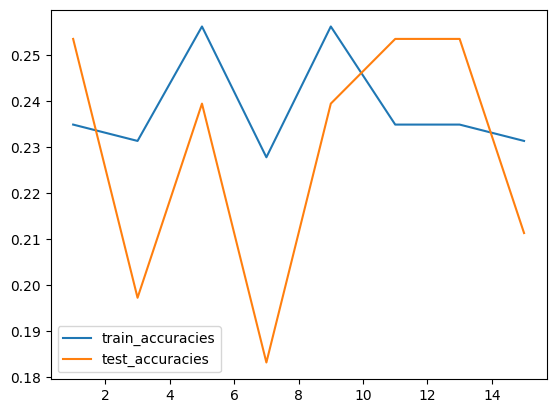

In [40]:
plt.plot(k_values,train_accuracies)
plt.plot(k_values,test_accuracies)
plt.legend(['train_accuracies','test_accuracies'])

#### cross validation (k fold)

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
cv_result = cross_validate(knn,x_train[["balanced normalized","income normalized"]],y_train,cv=4,return_train_score = True)
cv_result

{'fit_time': array([0.00644422, 0.03325248, 0.        , 0.        ]),
 'score_time': array([0.01138711, 0.00656199, 0.0173471 , 0.02772069]),
 'test_score': array([0.14084507, 0.25714286, 0.24285714, 0.24285714]),
 'train_score': array([0.16190476, 0.2464455 , 0.26066351, 0.25118483])}

In [43]:
print("Training Data Accuracy ",cv_result["train_score"])

Training Data Accuracy  [0.16190476 0.2464455  0.26066351 0.25118483]


In [44]:
print("Testing Data Accuracy ",cv_result["test_score"])

Testing Data Accuracy  [0.14084507 0.25714286 0.24285714 0.24285714]


In [45]:
print("Training Data Average Accuracy ",cv_result["train_score"].mean()*100)

Training Data Average Accuracy  23.004965019183025


In [46]:
print("Testing Data Average Accuracy ",cv_result["test_score"].mean()*100)

Testing Data Average Accuracy  22.092555331991953


In [47]:
knn.fit(x_train[["balanced normalized","income normalized"]],y_train)

KNeighborsClassifier(metric='euclidean')

In [48]:
test_predictions =  knn.predict(x_test[["balanced normalized","income normalized"]])

In [49]:
test_accuracy = accuracy_score(y_test,test_predictions)

In [50]:
test_accuracy

0.23943661971830985

#### grid search cv¶

In [51]:
 from sklearn.model_selection import GridSearchCV

In [52]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")

In [53]:
param_grid = {"n_neighbors":np.arange(1,16,2)}

In [54]:
knn_with_gs = GridSearchCV(knn,param_grid,return_train_score=True,verbose=True,scoring="accuracy")

In [55]:
knn_with_gs.fit(x_train[["balanced normalized","income normalized"]],y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             return_train_score=True, scoring='accuracy', verbose=True)

In [56]:
knn_with_gs.cv_results_

{'mean_fit_time': array([0.00573592, 0.00223889, 0.00336528, 0.00312443, 0.00702176,
        0.00624795, 0.00488353, 0.00162964]),
 'std_fit_time': array([0.00946141, 0.00195686, 0.00673056, 0.00624886, 0.00820198,
        0.00765214, 0.00635869, 0.00169365]),
 'mean_score_time': array([0.0109592 , 0.01017675, 0.00940385, 0.00938764, 0.00818877,
        0.01131592, 0.00651803, 0.00869441]),
 'std_score_time': array([0.00431335, 0.00702369, 0.00767822, 0.00766501, 0.00702804,
        0.00644941, 0.00745199, 0.00723466]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_neighbors': np.int64(1)},
  {'n_neighbors': np.int64(3)},
  {'n_neighbors': np.int64(5)},
  {'n_neighbors': np.int64(7)},
  {'n_neighbors': np.int64(9)},
  {'n_neighbors': np.int64(11)},
  {'n_neighbors': np.int64(13)},
  {'n_neighbors': np.int64(15)}],
 'split0_test_score': array([0

In [57]:
tunned_df = pd.DataFrame(knn_with_gs.cv_results_)
tunned_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005736,0.009461,0.010959,0.004313,1,{'n_neighbors': 1},0.140351,0.196429,0.214286,0.250000,...,0.210213,0.040628,8,0.138393,0.244444,0.240000,0.231111,0.231111,0.217012,0.039647
1,0.002239,0.001957,0.010177,0.007024,3,{'n_neighbors': 3},0.228070,0.214286,0.178571,0.267857,...,0.224185,0.028859,3,0.250000,0.235556,0.244444,0.222222,0.231111,0.236667,0.009788
2,0.003365,0.006731,0.009404,0.007678,5,{'n_neighbors': 5},0.228070,0.267857,0.232143,0.214286,...,0.238471,0.018599,1,0.241071,0.253333,0.262222,0.257778,0.248889,0.252659,0.007302
3,0.003124,0.006249,0.009388,0.007665,7,{'n_neighbors': 7},0.228070,0.196429,0.214286,0.196429,...,0.217043,0.020324,4,0.241071,0.244444,0.240000,0.235556,0.222222,0.236659,0.007757
4,0.007022,0.008202,0.008189,0.007028,9,{'n_neighbors': 9},0.228070,0.267857,0.232143,0.196429,...,0.234900,0.023868,2,0.241071,0.244444,0.262222,0.235556,0.231111,0.242881,0.010696
5,0.006248,0.007652,0.011316,0.006449,11,{'n_neighbors': 11},0.228070,0.196429,0.214286,0.196429,...,0.213471,0.015122,7,0.250000,0.244444,0.235556,0.235556,0.222222,0.237556,0.009439
6,0.004884,0.006359,0.006518,0.007452,13,{'n_neighbors': 13},0.245614,0.196429,0.214286,0.196429,...,0.216980,0.019503,5,0.250000,0.244444,0.226667,0.235556,0.222222,0.235778,0.010433
7,0.001630,0.001694,0.008694,0.007235,15,{'n_neighbors': 15},0.245614,0.196429,0.214286,0.196429,...,0.216980,0.019503,5,0.250000,0.244444,0.226667,0.235556,0.222222,0.235778,0.010433


In [58]:
tunned_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [59]:
tunned_df = tunned_df[["param_n_neighbors","mean_test_score","mean_train_score"]]

In [60]:
tunned_df

,param_n_neighbors,mean_test_score,mean_train_score
0,1,0.210213,0.217012
1,3,0.224185,0.236667
2,5,0.238471,0.252659
3,7,0.217043,0.236659
4,9,0.234900,0.242881
5,11,0.213471,0.237556
6,13,0.216980,0.235778
7,15,0.216980,0.235778


In [61]:
knn11 = KNeighborsClassifier(n_neighbors = 11,metric = 'euclidean')
knn11.fit(x_train[["balanced normalized","income normalized"]],y_train)
test_predictions = knn11.predict(x_test[["balanced normalized","income normalized"]])
train_predictions = knn11.predict(x_train[["balanced normalized","income normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Test accuracy =",test_accuracy)
train_accuracy = accuracy_score(y_train,predictions_train)
print("Train accuracy =",train_accuracy)

Test accuracy = 0.19718309859154928
Train accuracy = 0.2313167259786477


In [62]:
knn_with_gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=np.int64(5))